In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy as sp
from hmmlearn import hmm
import FinanceDataReader as fdr


mu :
 [[-0.53590672]
 [ 0.80395832]
 [-0.51907363]]

vol :
 [[0.09143647]
 [0.08685948]
 [0.4185217 ]]

Transition :
 [[0.87082941 0.10406016 0.02511043]
 [0.10715585 0.88707922 0.00576493]
 [0.02256094 0.05523268 0.92220637]]


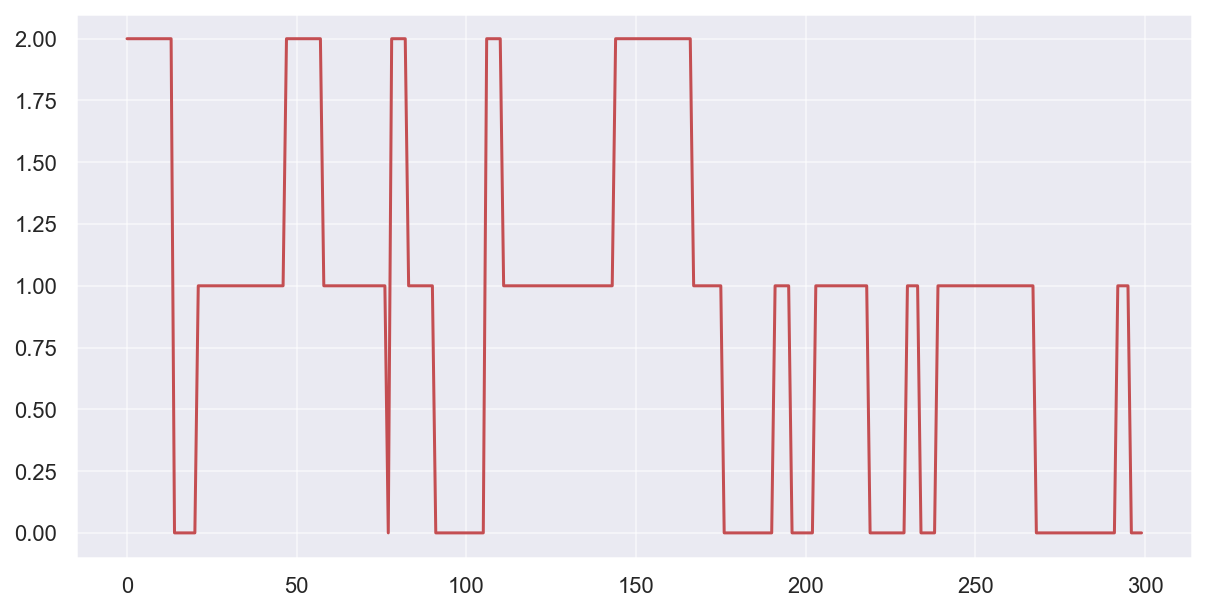

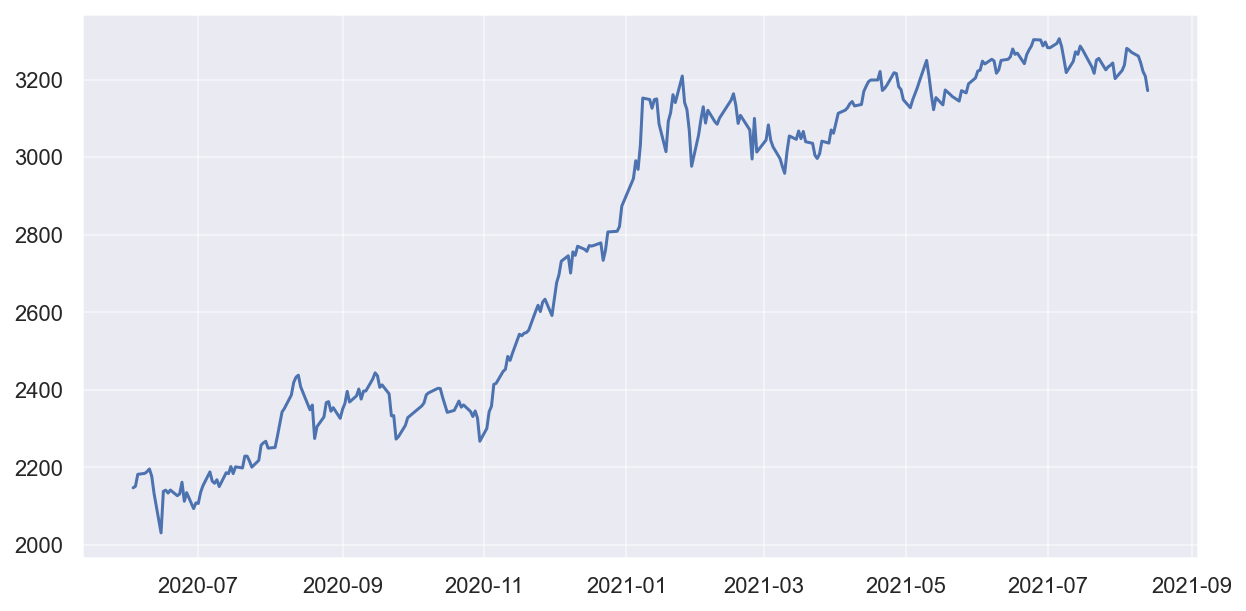

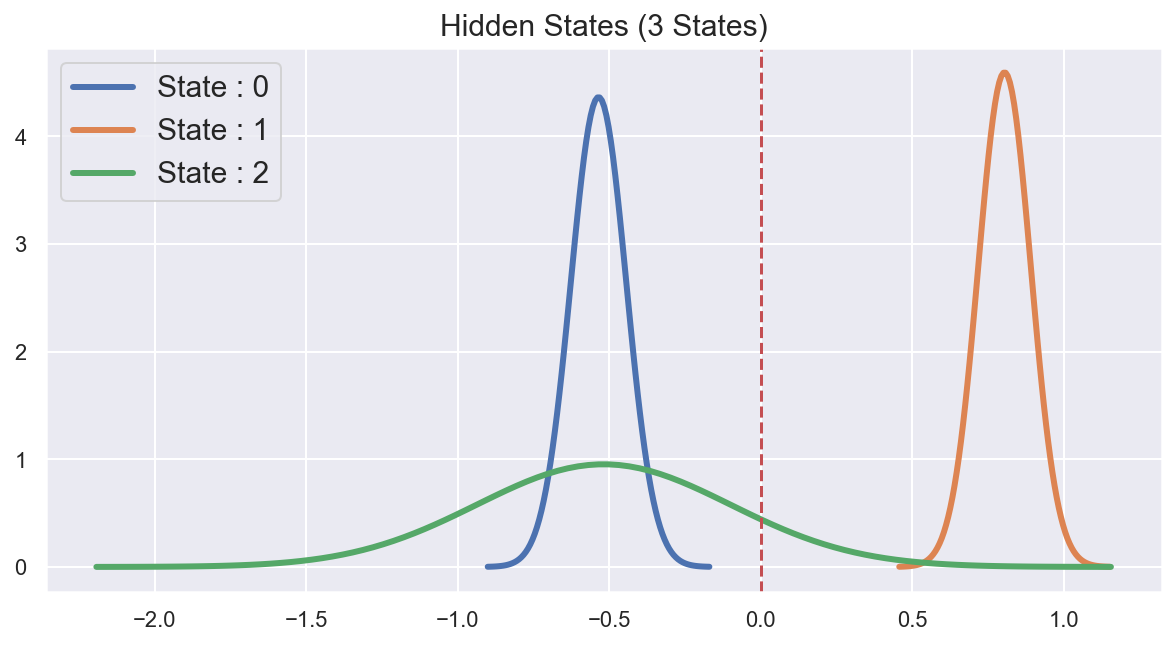

State 0 : 39.59025470653378%
State 1 : 44.988925802879294%
State 2 : 15.420819490586931%


In [2]:
df = fdr.DataReader('KS11', start='2007-01-01')

price = df['Close']
df['log_return'] = np.log(price) - np.log(price.shift(5))
df = df.dropna()
dataset = np.array(df['log_return'])
dataset = np.reshape(dataset, (dataset.shape[0], 1))

num_state = 3

model = hmm.GaussianHMM(n_components=num_state, tol=0.001, n_iter=10000)
model.fit(dataset)

pred_hidden_state = model.predict(dataset)

# predict한 hidden state의 distribution
mu = np.array(model.means_) * 52
sigma = np.array([np.sqrt(x) for x in model.covars_]) * np.sqrt(52)
sigma = np.reshape(sigma, (num_state, 1))

# 추정한 Transition Prob
transition_matrix = np.array(model.transmat_)

print("\nmu :\n", mu)
print("\nvol :\n", sigma)
print("\nTransition :\n", transition_matrix)

#히든
plt.figure(figsize=(10,5))
plt.plot(pred_hidden_state[-300:], 'r-')
plt.grid(True, alpha=0.5)
plt.show()

#주가
plt.figure(figsize=(10,5))
plt.plot(price[-300:])
plt.grid(True, alpha=0.5)
plt.show()

#히든놈의 분포
plt.figure(figsize=(10,5))
for i in range(num_state):
    x = np.linspace(mu[i] - 4*sigma[i], mu[i]+4*sigma[i], 100)
    plt.plot(x, sp.stats.norm.pdf(x, mu[i], sigma[i]), linewidth=3, label = 'State : '+str(i))
plt.title("Hidden States (" + str(num_state) + " States)", fontsize=15)
plt.axvline(x=0, color='r', linestyle='--')
plt.legend(loc = 'upper left', fontsize=15)
plt.grid(True)
plt.show()

# 각 State 비중
for i in range(num_state):
    prob = len(np.where(pred_hidden_state==i)[0]) / len(pred_hidden_state)
    print(f"State {i} : {prob * 100}"+'%')